In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams["savefig.format"] = 'pdf'
sns.set(font_scale=1.5, rc={'text.usetex' : True})
sns.set_style("white")
sns.set_style("ticks")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [2]:
def plot_inference_result(data, portion, true_parameter = False, save = False):
    print("number of samples: ", data.shape[0])
    if true_parameter:
        posterior_df = pd.DataFrame(np.exp(data[round(data.shape[0]*(1-portion)):,:]), columns=[r"$A$", r"$\beta_{i,e}$", r"$\nu_{s,e,r}$", r"$\nu_i$", r"$\gamma_e$", r"$\gamma_r$", r"$\gamma_d$", r"$\sigma$", r"$R_e$"])
    else:
        posterior_df = pd.DataFrame(data[round(data.shape[0]*(1-portion)):,:], columns=[r"$\ln(A)$", r"$\ln(\beta_{i,e})$", r"$\ln(\nu_{s,e,r})$", r"$\ln(\nu_i)$", r"$\ln(\gamma_e)$", r"$\ln(\gamma_r)$", r"$\ln(\gamma_d)$", r"$\ln(\sigma)$",r"$\ln(I_e)$"])
    g = sns.PairGrid(posterior_df)
    g = g.map_upper(sns.scatterplot)
    g = g.map_lower(sns.kdeplot, colors="C0")
    g = g.map_diag(sns.kdeplot, lw=2)

In [4]:
#data_path = './inference_result/full_t20_run/'
#data_path = './inference_result/synthetic_sd15_t5/'
#data_path = './inference_result/synthetic_sd25_t5/'

data_path = 'mcmc_4/param_dim_7/calibration_result/run_4/'

In [7]:
qoi = np.load(data_path + 'qoi.npy')
print(qoi.shape)

(220, 25, 2)


In [8]:
data = np.load(data_path + 'data.npy')
print(data.shape)

(25, 2)


In [9]:
acceptance = np.load(data_path + 'acceptance_rate.npy')
print(acceptance.shape)

(220,)


In [10]:
cost = np.load(data_path + 'cost.npy')
print(cost.shape)

(220,)


In [31]:
post_samples = np.load(data_path + 'param_samples.npy')
print(post_samples.shape)

(220, 7)


<Figure size 432x288 with 0 Axes>

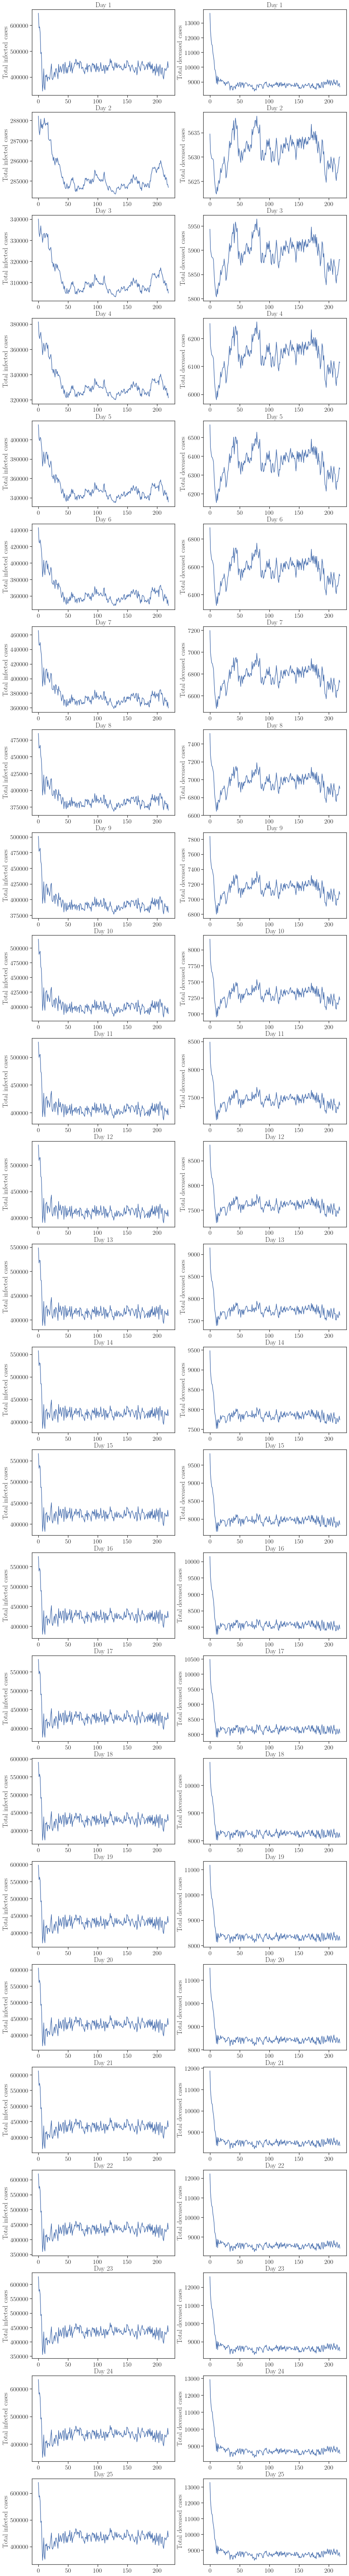

In [13]:
plt.figure(1)
fig, axs = plt.subplots(nrows=qoi.shape[1], ncols=2, figsize=(15,qoi.shape[1]*5))
for row in range(qoi.shape[1]):
    axs[row, 0].plot(np.arange(qoi.shape[0]), qoi[:,row-1,0])
#     axs[row, 0].axhline(y=noisey_solution[row-1, 0], color='r', linestyle='-')
#     if synthetic_data_used:
#         axs[row, 0].axhline(y=true_solution[row-1, 0], color='b', linestyle='--')
    axs[row, 0].set_title(r"Day " + str(row+1))
    axs[row, 0].set_ylabel(r'Total infected cases')
    axs[row, 1].plot(np.arange(qoi.shape[0]), qoi[:,row-1,1])
#     axs[row, 1].axhline(y=noisey_solution[row-1, 1], color='r', linestyle='-')
#     if synthetic_data_used:
#         axs[row, 1].axhline(y=true_solution[row-1, 1], color='g', linestyle='--')
    axs[row, 1].set_title(r"Day " + str(row+1))
    axs[row, 1].set_ylabel(r'Total deceased cases')
plt.show()

Integrated autocorrelation time 16.289018602470293


(0.0, 1.0)

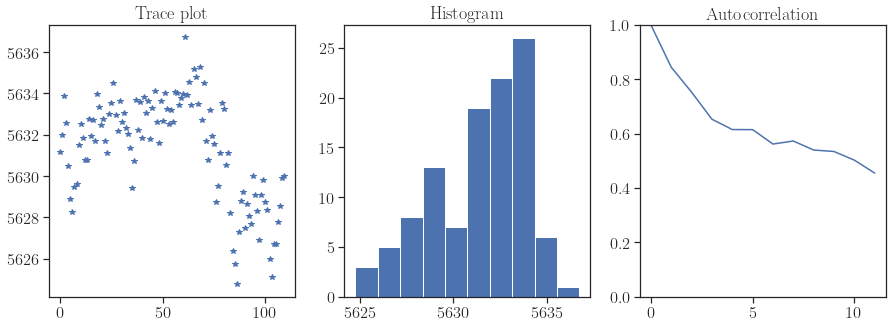

In [15]:
import hippylib as hl
day = 1
q = qoi[round(qoi.shape[0]/2.):, day-1, 1]
# q = qoi[:, day-1, 0]
integrated_corr_time, lags, acorrs = hl.integratedAutocorrelationTime(q)
print ("Integrated autocorrelation time", integrated_corr_time)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(q, '*b')
plt.title(r'Trace plot')

plt.subplot(132)
plt.hist(q)
plt.title(r'Histogram')

plt.subplot(133)
plt.plot(lags, acorrs, '-b') 
plt.title(r'Autocorrelation')
plt.ylim([0., 1.])
    

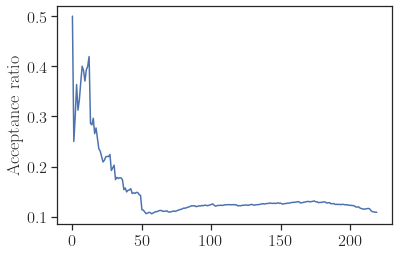

[0.5        0.25       0.3        0.36363636 0.3125     0.33333333
 0.36842105 0.4        0.39130435 0.37037037 0.39285714 0.4
 0.41935484 0.28571429 0.28301887 0.2962963  0.265625   0.27692308
 0.25675676 0.23529412 0.23076923 0.22       0.20909091 0.21238938
 0.21929825 0.22033898 0.2195122  0.224      0.19205298 0.19736842
 0.20261438 0.17391304 0.17837838 0.1761658  0.17766497 0.1773399
 0.17370892 0.15384615 0.15725806 0.14925373 0.15241636 0.15328467
 0.1557971  0.1461794  0.14754098 0.14649682 0.14826498 0.14814815
 0.14369501 0.14245014 0.11383929 0.11304348 0.10950413 0.10588235
 0.10700389 0.10852713 0.10795455 0.10564663 0.10707804 0.10869565
 0.1101083  0.10992908 0.11150442 0.1122807  0.11226252 0.11055276
 0.1107438  0.11092985 0.11147011 0.109375   0.10923077 0.1097561
 0.11060606 0.1112782  0.11045655 0.11160059 0.11290323 0.11386861
 0.11432706 0.11560694 0.11688312 0.11680912 0.1177305  0.11881188
 0.11954993 0.12078652 0.12167832 0.12137931 0.12175103 0.11984021
 0.1

In [16]:
plt.plot(np.arange(acceptance.size), acceptance)
plt.ylabel('Acceptance ratio')
plt.show()
print(acceptance)

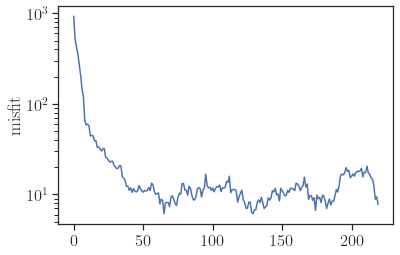

In [17]:
plt.semilogy(np.arange(cost.size), cost)
plt.ylabel('misfit')
plt.show()


In [32]:
post_samples = post_samples[round(post_samples.shape[0]*0.1):, :]
# post_samples = post_samples[150:, :]
print(post_samples.shape)

(198, 7)


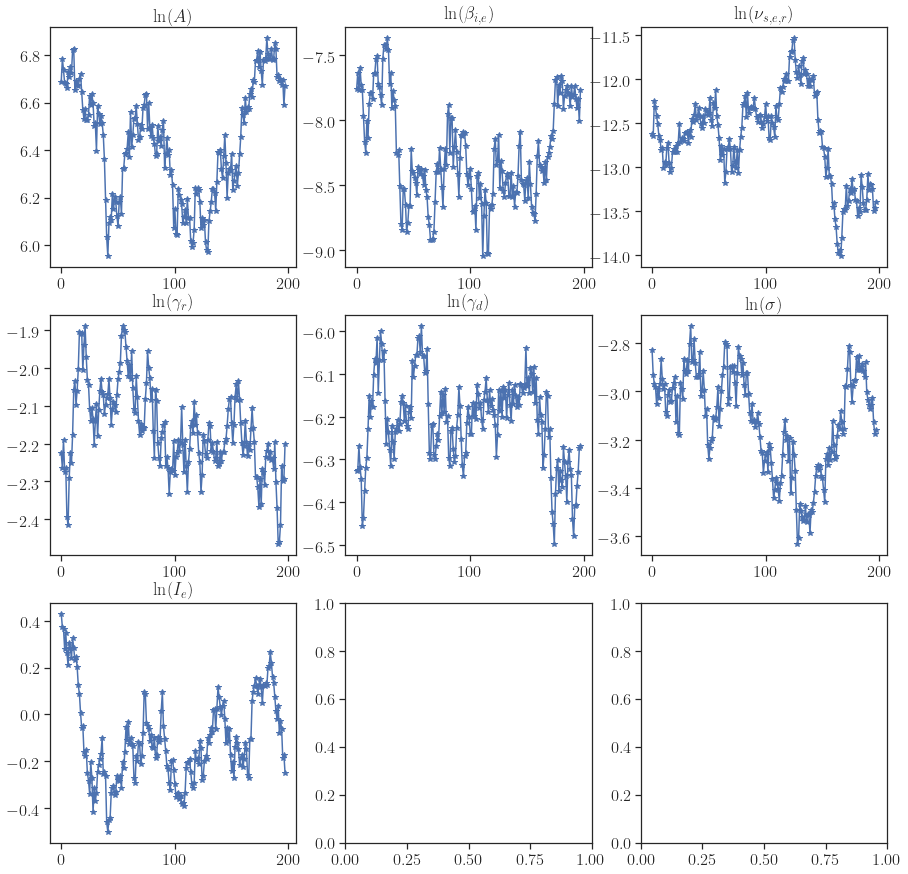

In [33]:
titles = [r"$\ln(A)$", r"$\ln(\beta_{i,e})$", r"$\ln(\nu_{s,e,r})$", r"$\ln(\gamma_r)$", r"$\ln(\gamma_d)$", r"$\ln(\sigma)$",r"$\ln(I_e)$"]
# titles = [r"$\ln(A)$", r"$\ln(\beta_{i,e})$", r"$\ln(\nu_{s,e,r})$", r"$\ln(\nu_i)$", r"$\ln(\gamma_e)$", r"$\ln(\gamma_r)$", r"$\ln(\gamma_d)$", r"$\ln(\sigma)$",r"$\ln(I_e)$"]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
idx = 0
for col in range (3):
    for row in range (3):
        if idx < 7:
            axs[col, row].plot(np.arange(post_samples.shape[0]), post_samples[:, idx], '*-')
            axs[col, row].set_title(titles[idx])
        idx +=1

Integrated autocorrelation time 27.772167793233884
Integrated autocorrelation time 21.91893787831521
Integrated autocorrelation time 28.594896565222946
Integrated autocorrelation time 18.01677151704898
Integrated autocorrelation time 13.712024606518623
Integrated autocorrelation time 27.900063167036926
Integrated autocorrelation time 18.6725464449547


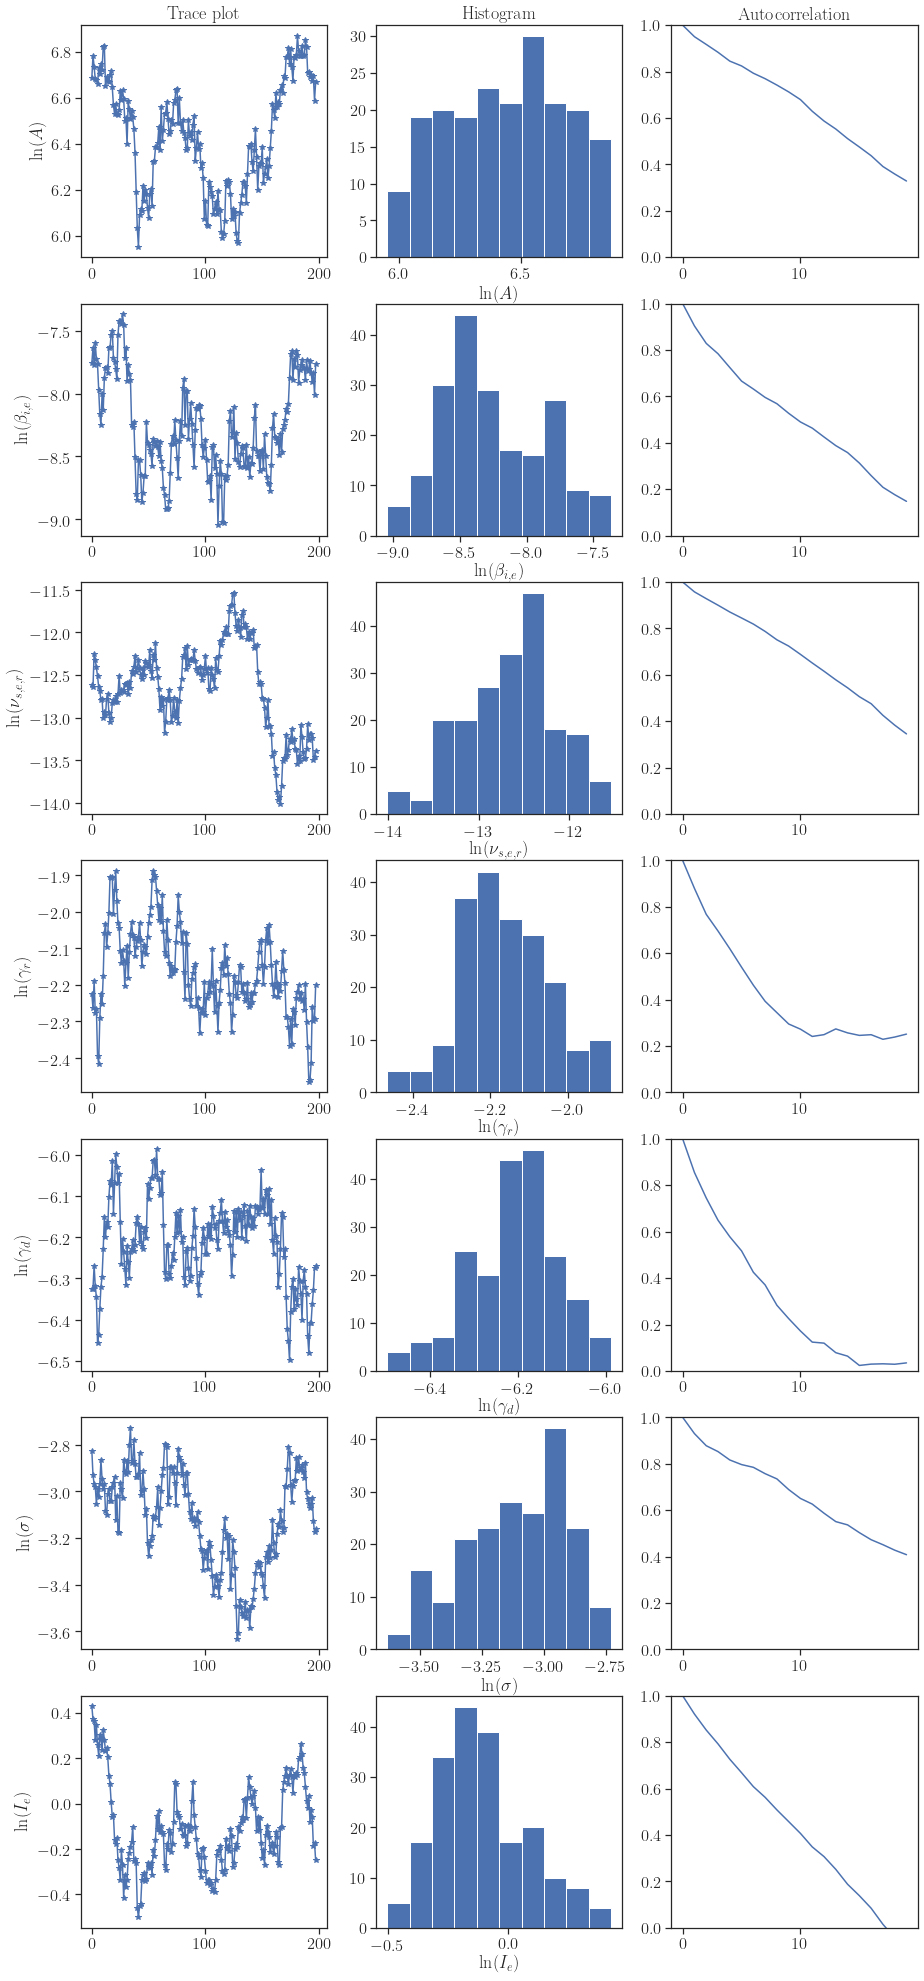

In [34]:
import hippylib as hl

fig, axs = plt.subplots(nrows=post_samples.shape[1], ncols=3, figsize=(15,post_samples.shape[1]*5))
for row in range(post_samples.shape[1]):
    integrated_corr_time, lags, acorrs = hl.integratedAutocorrelationTime(post_samples[:, row])
    print ("Integrated autocorrelation time", integrated_corr_time)
    axs[row, 0].plot(post_samples[:, row], '*-b')
    
    axs[row, 0].set_ylabel(titles[row])
    axs[row, 1].hist(post_samples[:, row])
    
    axs[row, 1].set_xlabel(titles[row])
    axs[row, 2].plot(lags, acorrs, '-b')
    axs[row, 2].set_ylim([0., 1.])
    
axs[0, 0].set_title(r'Trace plot')
axs[0, 1].set_title(r'Histogram')
axs[0, 2].set_title(r'Autocorrelation')
plt.show()

In [27]:
#plot_inference_result(param_data, 1., true_parameter = False)

In [35]:
mean = np.exp(np.mean(post_samples, axis = 0))

In [36]:
print(mean)

[6.23835500e+02 2.60661225e-04 3.17439791e-06 1.15304277e-01
 2.00979769e-03 4.42723921e-02 8.99528130e-01]


In [ ]:
run_names = [None]*5
for i in range(4):
    run_names[i] = "run_" +str(i+1) + "/"
for i in range(4):
    data_path = '../../Results/mcmc_multi_chain/mcmc_4/param_dim_7/validation_result/' + run_names[i]
    param_name = 'param_samples'
    param_data = np.load(data_path + param_name + '.npy')
    
    qoi_data = np.load(data_path + 'qoi.npy')
    if i == 0:
#         total_param_data = param_data[round(param_data.shape[0]/2.):, :].copy()
        total_param_data = param_data[300:, :].copy()
        total_qoi_data = qoi_data[300:, :].copy()
    else:
#         total_param_data = np.append(total_param_data, param_data[round(param_data.shape[0]/2.):, :], axis = 0)
        total_param_data = np.append(total_param_data, param_data[300:, :], axis = 0)
        total_qoi_data = np.append(total_qoi_data, qoi_data[300:, :], axis = 0)
#     mean = np.exp(np.mean(param_data, axis = 0))
#     print(mean)

In [ ]:
total_param_data.shape, total_qoi_data.shape

In [ ]:
plot_inference_result(total_param_data, 1., true_parameter = False)

In [ ]:
mean_more = np.exp(np.mean(total_param_data, axis = 0))

In [ ]:
print(mean_more)

In [ ]:
print(mean_new)
print(mean_more)

In [ ]:
print(np.log(mean_1))
print(np.log(mean_2))
print(np.log(mean_3))

In [ ]:
total_param_data.shape

In [ ]:
posterior = np.delete(total_param_data, [3,4], axis = 1)

In [ ]:
posterior.shape

In [ ]:
print(np.exp(np.mean(posterior, axis = 0)))

In [ ]:
np.save('calibration_posterior_samples.npy', posterior)

In [38]:
import dolfin as dl
import hippylib as hl
mesh_path = '../../Data/mesh/'
mesh = dl.Mesh(mesh_path + "mesh_5h.xml")
Vh_PARAMETER = dl.VectorFunctionSpace(mesh, "R", degree=0, dim=7)
p_mean = np.mean(post_samples, axis = 0)
p_cov = np.cov(post_samples, rowvar = False)
mean = dl.Function(Vh_PARAMETER)
mean.vector().set_local(p_mean)
prior = hl.GaussianRealPrior(Vh_PARAMETER, p_cov, mean=mean.vector())

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [39]:
noise = dl.Vector()
prior.init_vector(noise,"noise")
hl.parRandom.normal(1., noise)
m = dl.Vector()
prior.init_vector(m, 0)
n_samples = 1000000
prior_samples = np.empty((n_samples ,7))
for i in range(n_samples):
    hl.parRandom.normal(1., noise)
    prior.sample(noise,m)
    prior_samples[i,:] = m.get_local()

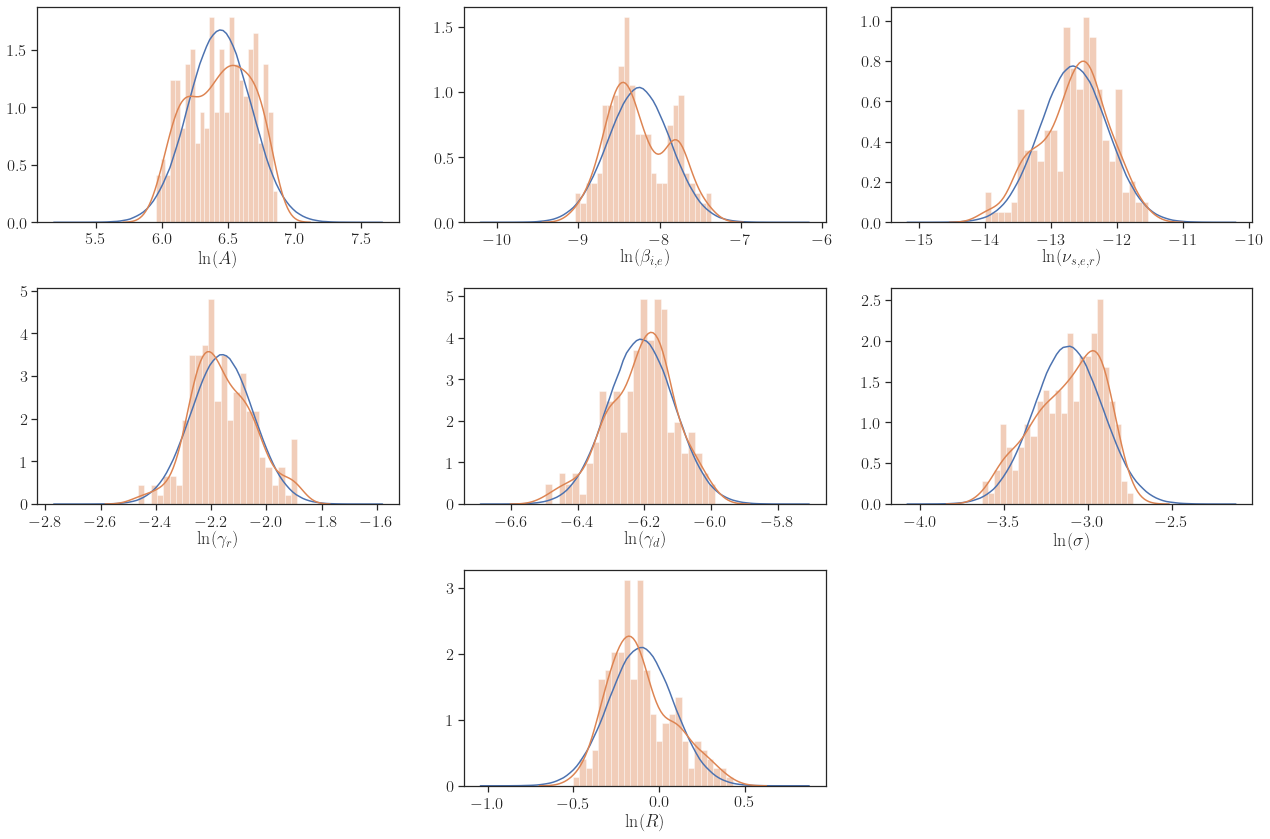

In [40]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (18,12))
titles = [r"$\ln(A)$", r"$\ln(\beta_{i,e})$", r"$\ln(\nu_{s,e,r})$", r"$\ln(\gamma_r)$", r"$\ln(\gamma_d)$", r"$\ln(\sigma)$",r"$\ln(R)$"]
idx = 0
for row in range(3):
    for col in range(3):
        if not row == 2 or col == 1:
            sns.distplot(prior_samples[:, idx], hist=False, ax=ax[row, col]);
            sns.distplot(post_samples[:, idx], hist=True, bins = 25, ax=ax[row, col])
            ax[row,col].set_xlabel(titles[idx])
            idx += 1
        else:
            ax[row, col].axis('off')
fig.tight_layout()
# plt.savefig("prior_vs_posterior_validation.pdf",bbox_inches = "tight")

In [ ]:
data_path = '../../Data/covid_11August2020/'
infected_total_district = np.loadtxt(data_path + 'infected_total_district.txt')
deceased_district = np.loadtxt(data_path + 'deceased_district.txt')

In [ ]:
infected_total_district.shape
deceased_district.shape

In [ ]:
data_start = "2020-07-15"
date = "2020-07-15"

In [ ]:
simulation_time = 25

In [ ]:
def validate_date(date_text):
    try:
        datetime.strptime(date_text, '%Y-%m-%d')
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")
        
def extract_district_dataset(infected_cases, deceased_cases, date, simulation_time):        
    validate_date(date)
    d0 = datetime.strptime(data_start, "%Y-%m-%d")
    d1 = datetime.strptime(date, "%Y-%m-%d")
    day_index = abs((d1-d0)).days
        
    if not infected_cases.size == deceased_cases.size:
        raise IndexError("The total decease cases data and the total infected cases data does not match in size. Please re-check the data")
        
    data = np.empty((round(simulation_time), 25, 2))
    data[:, :, 0] = infected_cases[day_index+1:(day_index + round(simulation_time)+1):1, :]
    data[:, :, 1] = deceased_cases[day_index+1:(day_index + round(simulation_time)+1):1, :]
    return data

In [ ]:
district_data = extract_district_dataset(infected_total_district, deceased_district, date, simulation_time)

In [ ]:
print(district_data.shape)

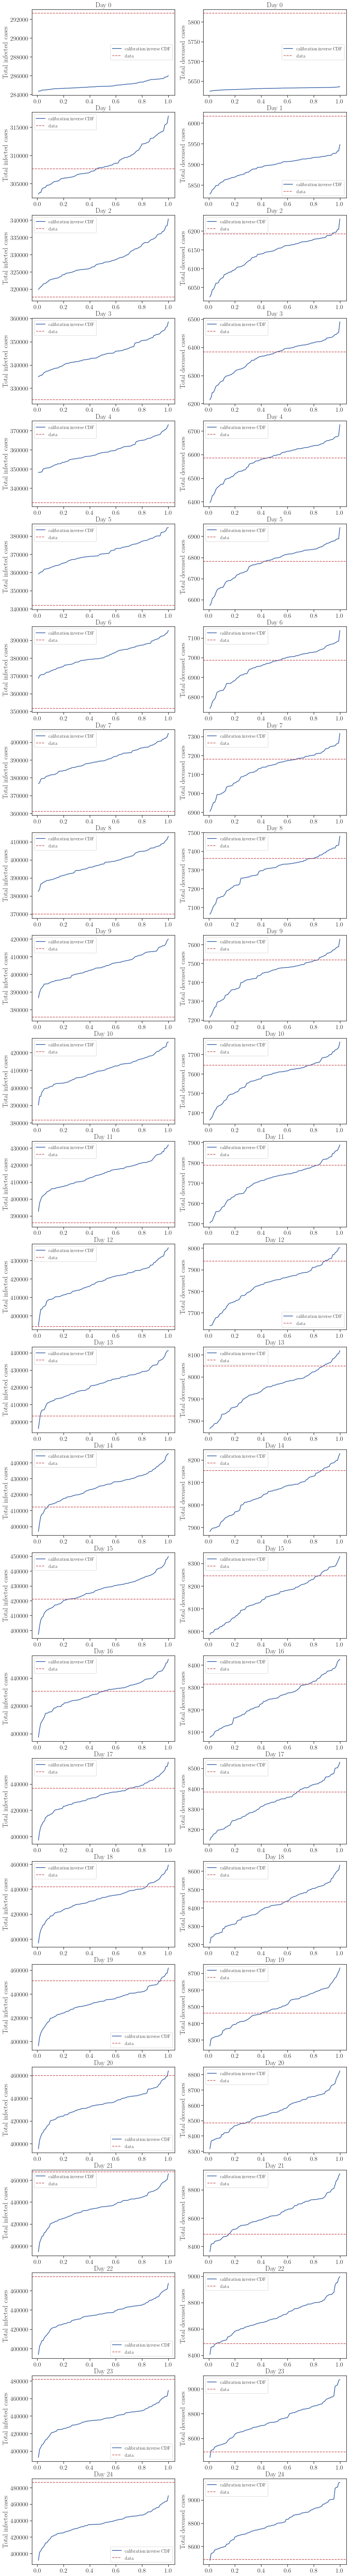

In [45]:
qoi = qoi[round(qoi.shape[0]*0.5):, :, :]

fig, axs = plt.subplots(nrows=25, ncols=2, figsize=(15,5*25))
for row in range(25):
    x_c = np.sort(qoi[:,row,0])
    n_c = x_c.size
    y_c = np.arange(1, n_c+1) / n_c
    axs[row, 0].plot(y_c, x_c, label = r'calibration inverse CDF', linewidth = 2.)
    axs[row, 0].axhline(y = data[row, 0], color='r', linestyle='--', label = r'data')
    axs[row, 0].set_title(r"Day " + str(row))
    axs[row, 0].set_ylabel(r'Total infected cases')
    axs[row, 0].legend(fontsize = 12, fancybox=True)
    
    x_c = np.sort(qoi[:,row,1])
    n_c = x_c.size
    y_c = np.arange(1, n_c+1) / n_c
    axs[row, 1].plot(y_c, x_c, label = 'calibration inverse CDF', linewidth = 2.)
    axs[row, 1].axhline(y = data[row, 1], color='r', linestyle='--', label = r'data')
    axs[row, 1].set_title(r"Day " + str(row))
    axs[row, 1].set_ylabel(r'Total deceased cases')
    axs[row, 1].legend(fontsize = 12, fancybox=True)

# plt.savefig("calibration_vs_validation_inv_cdf.pdf",bbox_inches = "tight")